# MovieLens-100k   


In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

data = pd.read_csv("../../data/ml-100k/u.data",
                   delimiter="\t",
                   encoding="ISO-8859-1")
data.columns=["user","movie","rating","r_id"]

data.head()

,user,movie,rating,r_id
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


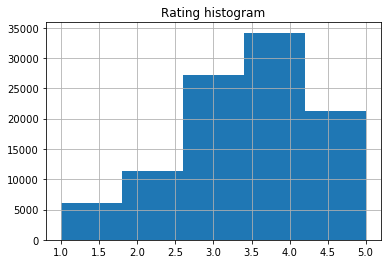

In [2]:
data["rating"].hist(bins=5).set_title("Rating histogram")

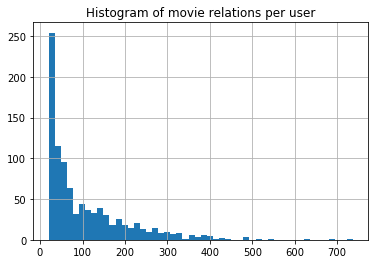

In [3]:
aux = data
aux["count"] = 1
movies_per_user = aux.groupby("user").sum()["count"]
plot = movies_per_user.hist(bins=50)
plot.set_title("Histogram of movie relations per user")

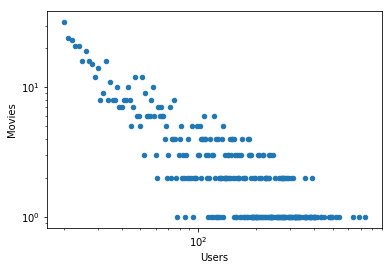

In [4]:
def to_loglog (series,x_label,y_label):
    aux_df = series.to_frame()
    aux_df.columns = ['count1']
    aux_df["count2"] = 1
    df = aux_df.groupby("count1").sum()["count2"].to_frame()
    df.reset_index(inplace=True)
    df.columns = [x_label,y_label]
    df.plot(kind='scatter',x=x_label,y=y_label,loglog=True)

to_loglog(movies_per_user,x_label='Users',y_label='Movies')

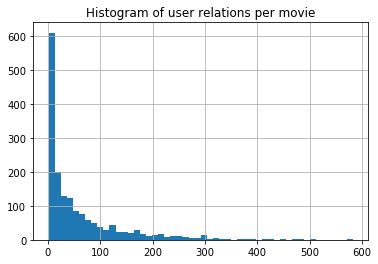

In [5]:
users_per_movie = data.groupby("movie").count()["count"]
plot = users_per_movie.hist(bins=50)
plot.set_title("Histogram of user relations per movie")

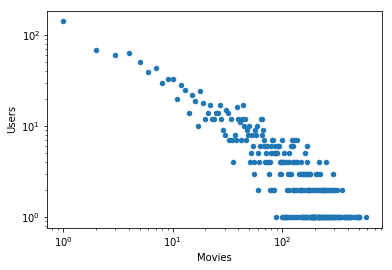

In [6]:
to_loglog(users_per_movie,x_label='Movies',y_label='Users')

## Sparsity    


Given that we have very different datasets, like *Jester* and *Amazon Books*, it's interesting to compare sparsity between the user-item matrices. Since at most each user has an edge with each artist, the maximum possible amount of edges is $|E|_{max} = |\mathrm{Artists}| * |\mathrm{Users}|$. So we define sparsity:    

\begin{equation}
    \mathrm{Sparsity} = \frac{|E|}{|E|_{max}}
\end{equation}    

In [7]:
n_users = data["user"].unique().shape[0]
n_movies = data["movie"].unique().shape[0]

sparsity = data.shape[0]/(n_users*n_movies)
print("Sparsity is %.8f"%sparsity)

Sparsity is 0.06304606
